# Preprocessing des Données - Statistiques Joueurs Européens

## 1. Import des bibliothèques

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration pour de meilleurs affichages
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

print("Bibliothèques importées avec succès")

Bibliothèques importées avec succès


## 2. Chargement des données

In [29]:
# Charger le fichier CSV
df = pd.read_csv('../data/cleaned_scouting_report.csv')

print(f"Dimensions du dataset : {df.shape[0]} joueurs × {df.shape[1]} colonnes")
print("="*80)

Dimensions du dataset : 1833 joueurs × 23 colonnes


### 2.1 Aperçu des premières lignes

In [30]:
df.head(10)

,player_name,Position,Team Name,Buts (sans les pénaltys),npxG: xG sans les pénaltys,Total des tirs,Passes décisives,xAG: Prévu(s) Buts assistés,npxG + xAG,Actions menant à un tir,Passes tentées,% de passes réussies,Passes progressives,Possessions progressives,Dribbles réussis,Touches (SurfRépOff),Passes progressives reçues,Tacles,Interceptions,Balles contrées,Dégagements,Duel aérien gagnés,Age
0,Denis Zakaria,DM,Monaco,0.22,0.10,1.11,0.04,0.05,0.15,1.67,49.84,90.8%,4.75,1.04,1.26,1.00,1.08,1.71,1.78,1.48,2.04,0.52,27
1,Eliesse Ben Seghir,LW,Monaco,0.37,0.17,3.22,0.28,0.25,0.41,4.41,46.42,78.4%,5.79,5.88,1.56,4.32,10.02,2.39,0.18,1.20,0.28,0.64,19
2,Vanderson,RB,Monaco,0.16,0.08,1.24,0.16,0.12,0.19,1.78,56.94,74.2%,4.15,1.56,0.75,2.10,6.63,3.61,2.10,1.56,2.48,1.02,23
3,Thilo Kehrer,CB,Monaco,0.13,0.05,0.74,0.04,0.05,0.10,1.49,63.90,89.2%,5.90,0.83,0.13,1.14,0.96,2.23,1.62,0.87,3.93,1.66,28
4,Takumi Minamino,LW,Monaco,0.29,0.28,2.45,0.16,0.23,0.52,3.22,35.07,70.3%,4.16,1.79,0.65,4.77,7.87,1.14,0.53,1.22,0.41,0.41,29
5,Lamine Camara,CM,Monaco,0.12,0.07,1.20,0.19,0.13,0.20,2.98,43.90,75.7%,3.94,1.00,0.93,0.62,2.13,2.55,1.28,1.51,1.31,0.50,20
6,Folarin Balogun,CF,Monaco,0.37,0.53,3.65,0.18,0.17,0.69,3.20,19.51,71.4%,1.64,1.96,0.55,7.72,10.87,0.46,0.09,0.46,0.23,0.41,23
7,Maghnes Akliouche,RW,Monaco,0.22,0.23,1.89,0.22,0.19,0.42,4.70,46.82,77.6%,5.53,2.94,1.54,4.12,7.02,1.97,0.39,1.10,0.26,0.22,22
8,Mohammed Salisu,CB,Monaco,0.06,0.04,0.57,0.06,0.02,0.06,1.02,68.85,84.5%,6.25,0.97,0.23,0.80,0.45,2.44,1.65,1.54,3.81,3.30,25
9,Wilfried Singo,CB,Monaco,0.00,0.03,0.68,0.09,0.03,0.06,1.46,59.57,85.1%,5.69,1.54,0.98,1.11,1.71,1.46,2.18,1.20,3.55,2.44,23


### 2.2 Aperçu des dernières lignes

In [31]:
df.tail()

,player_name,Position,Team Name,Buts (sans les pénaltys),npxG: xG sans les pénaltys,Total des tirs,Passes décisives,xAG: Prévu(s) Buts assistés,npxG + xAG,Actions menant à un tir,Passes tentées,% de passes réussies,Passes progressives,Possessions progressives,Dribbles réussis,Touches (SurfRépOff),Passes progressives reçues,Tacles,Interceptions,Balles contrées,Dégagements,Duel aérien gagnés,Age
1828,Geovany Quenda,RB,Sporting,0.14,0.15,2.16,0.00,0.08,0.23,4.19,49.32,78.4%,4.32,5.14,1.62,3.92,8.92,0.95,0.27,0.68,0.95,0.68,17
1829,Tomás Araújo,CB,Benfica,0.08,0.07,0.61,0.08,0.03,0.09,1.59,70.21,88.3%,5.69,1.44,0.61,0.99,0.91,2.20,1.36,1.06,2.20,2.96,22
1830,Estevão,RW,Palmeiras,0.38,0.32,3.35,0.35,0.28,0.60,5.70,30.91,76.2%,3.46,5.50,3.39,6.24,12.20,1.39,0.27,0.62,0.31,0.42,17
1831,Martin Baturina,AM,Dinamo Zagreb,0.25,0.05,0.75,0.25,0.22,0.27,4.23,36.80,82.4%,5.47,4.72,2.98,2.49,3.98,1.99,0.50,1.24,0.25,0.00,21
1832,Mohamed Nassoh,AM,PSV,0.13,0.13,2.12,0.06,0.17,0.31,3.98,40.70,75.7%,5.71,3.98,1.35,3.47,8.86,1.93,0.45,1.41,0.64,0.71,22


## 3. Exploration initiale

### 3.1 Informations sur les colonnes

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_name                  1833 non-null   object 
 1   Position                     1833 non-null   object 
 2   Team Name                    1833 non-null   object 
 3   Buts (sans les pénaltys)     1833 non-null   float64
 4   npxG: xG sans les pénaltys   1833 non-null   float64
 5   Total des tirs               1833 non-null   float64
 6   Passes décisives             1833 non-null   float64
 7   xAG: Prévu(s) Buts assistés  1833 non-null   float64
 8   npxG + xAG                   1833 non-null   float64
 9   Actions menant à un tir      1833 non-null   float64
 10  Passes tentées               1833 non-null   float64
 11  % de passes réussies         1833 non-null   object 
 12  Passes progressives          1833 non-null   float64
 13  Possessions progre

### 3.2 Statistiques descriptives

In [33]:
df.describe()

,Buts (sans les pénaltys),npxG: xG sans les pénaltys,Total des tirs,Passes décisives,xAG: Prévu(s) Buts assistés,npxG + xAG,Actions menant à un tir,Passes tentées,Passes progressives,Possessions progressives,Dribbles réussis,Touches (SurfRépOff),Passes progressives reçues,Tacles,Interceptions,Balles contrées,Dégagements,Duel aérien gagnés
count,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000
mean,0.139776,0.137212,1.367769,0.104637,0.104697,0.242046,2.354424,45.592782,3.805052,1.858020,0.860693,2.373071,4.100284,1.669454,0.815085,1.120491,1.847812,1.313306
std,0.162674,0.134937,0.966043,0.111926,0.085387,0.187471,1.268819,16.870761,1.739037,1.361422,0.739798,1.871093,3.209845,0.770499,0.491287,0.448000,1.412947,1.035429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.400000,0.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.040000,0.560000,0.000000,0.040000,0.090000,1.430000,33.360000,2.550000,0.840000,0.330000,0.880000,1.130000,1.120000,0.430000,0.820000,0.730000,0.590000
50%,0.090000,0.080000,1.120000,0.080000,0.090000,0.190000,2.240000,44.930000,3.620000,1.550000,0.670000,1.690000,3.900000,1.610000,0.770000,1.090000,1.420000,1.070000
75%,0.200000,0.190000,2.050000,0.160000,0.150000,0.360000,3.120000,56.460000,4.820000,2.530000,1.180000,3.650000,6.210000,2.120000,1.140000,1.390000,2.690000,1.750000
max,1.120000,0.880000,4.990000,0.740000,0.700000,1.050000,8.290000,111.190000,12.300000,12.460000,6.360000,12.870000,17.540000,4.940000,2.960000,3.330000,7.150000,9.230000


### 3.3 Valeurs manquantes

In [34]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Valeurs manquantes': missing,
    'Pourcentage': missing_pct
})
missing_summary = missing_df[missing_df['Valeurs manquantes'] > 0].sort_values('Pourcentage', ascending=False)

if len(missing_summary) > 0:
    print("Colonnes avec valeurs manquantes :")
    display(missing_summary)
else:
    print("Aucune valeur manquante détectée")

Aucune valeur manquante détectée


## 4. Analyse par équipe et position

### 4.1 Distribution par équipe

Nombre total d'équipes : 102

10 équipes avec le plus de joueurs :


Team Name
Fiorentina      25
Como            25
Brighton        24
Ipswich Town    24
Napoli          24
Venezia         23
Wolves          22
Sevilla         22
Brest           22
Lyon            22
Name: count, dtype: int64

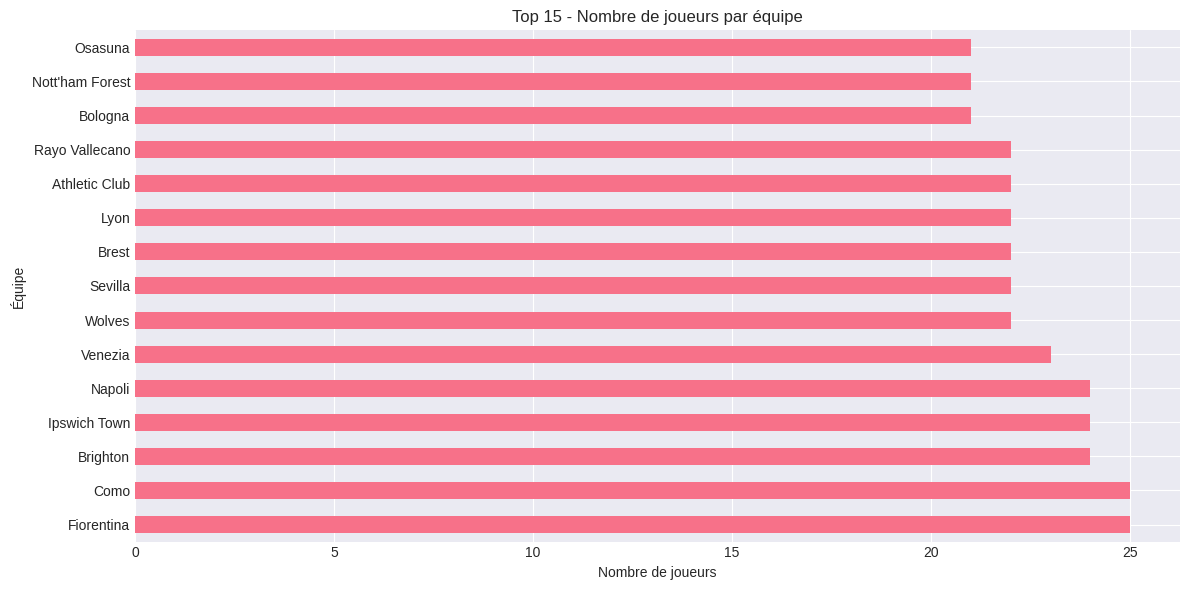

In [35]:
print(f"Nombre total d'équipes : {df['Team Name'].nunique()}")
print("\n10 équipes avec le plus de joueurs :")
team_counts = df['Team Name'].value_counts()
display(team_counts.head(10))

# Visualisation
plt.figure(figsize=(12, 6))
team_counts.head(15).plot(kind='barh')
plt.title('Top 15 - Nombre de joueurs par équipe')
plt.xlabel('Nombre de joueurs')
plt.ylabel('Équipe')
plt.tight_layout()
plt.show()

### 4.2 Distribution par position (avant nettoyage)

Nombre de positions différentes : 15

Répartition par position :


Position
CB          381
CM          270
CF          231
RB          174
DM          168
RW          147
LW          142
LB          142
AM          122
SS           17
RM           17
LM           13
MO            4
licensed      3
Attack        2
Name: count, dtype: int64

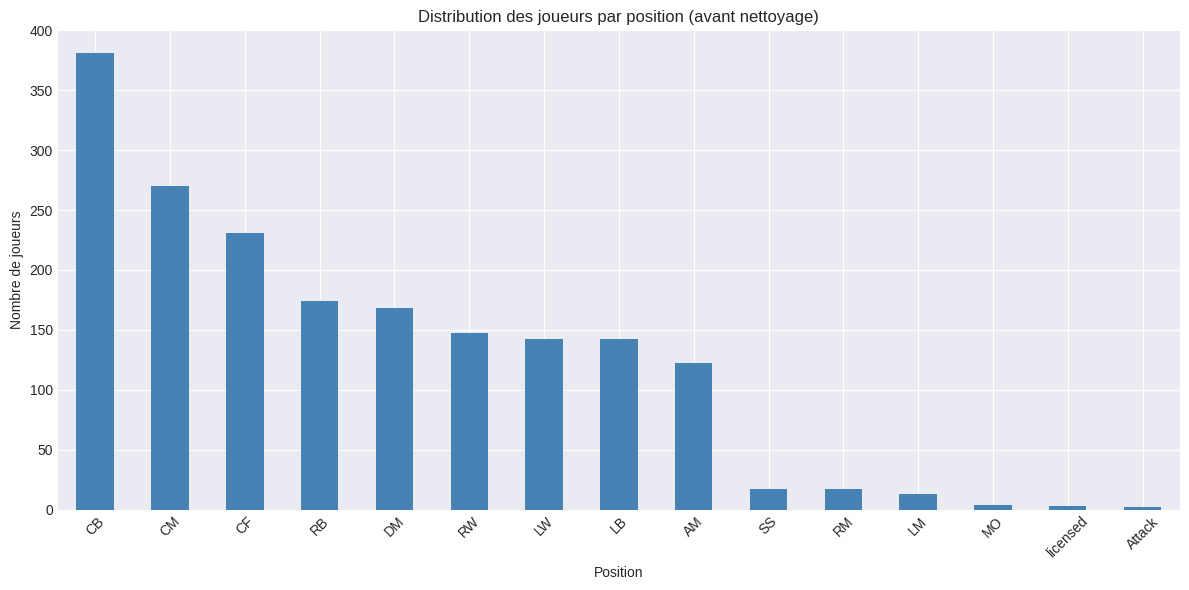

In [36]:
print(f"Nombre de positions différentes : {df['Position'].nunique()}")
print("\nRépartition par position :")
position_counts = df['Position'].value_counts()
display(position_counts)

# Visualisation
plt.figure(figsize=(12, 6))
position_counts.plot(kind='bar', color='steelblue')
plt.title('Distribution des joueurs par position (avant nettoyage)')
plt.xlabel('Position')
plt.ylabel('Nombre de joueurs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.3 Distribution de l'âge

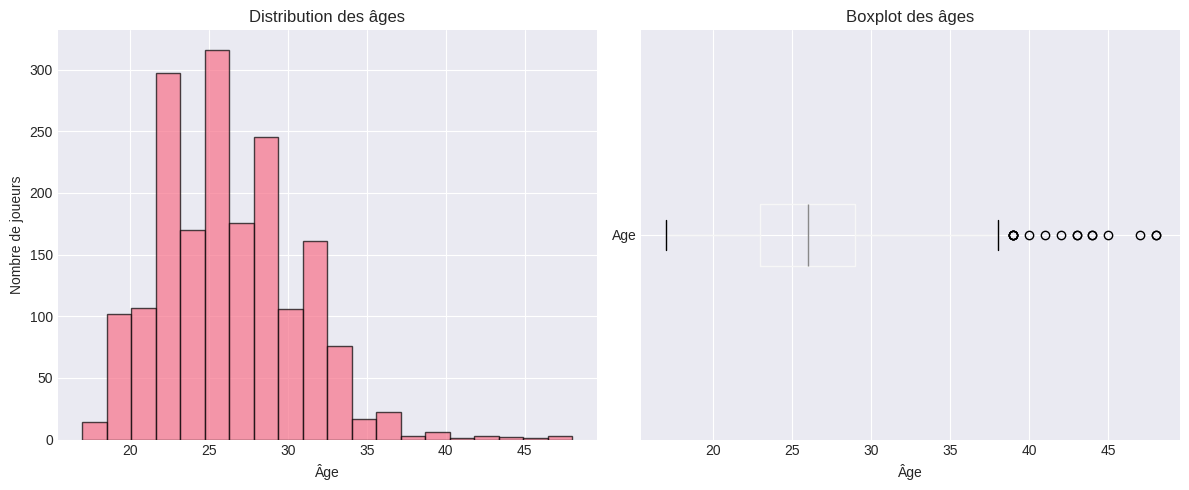

Âge moyen : 26.3 ans
Âge médian : 26.0 ans
Âge min : 17.0 ans
Âge max : 48.0 ans


In [37]:
# Convertir Age en numérique si nécessaire
if df['Age'].dtype == 'object':
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['Age'].hist(bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution des âges')
plt.xlabel('Âge')
plt.ylabel('Nombre de joueurs')

plt.subplot(1, 2, 2)
df.boxplot(column='Age', vert=False)
plt.title('Boxplot des âges')
plt.xlabel('Âge')

plt.tight_layout()
plt.show()

print(f"Âge moyen : {df['Age'].mean():.1f} ans")
print(f"Âge médian : {df['Age'].median():.1f} ans")
print(f"Âge min : {df['Age'].min()} ans")
print(f"Âge max : {df['Age'].max()} ans")

## 5. Nettoyage des données

### 5.1 Création d'une copie de travail

In [38]:
df_clean = df.copy()
print(f"Dataset copié : {df_clean.shape}")

Dataset copié : (1833, 23)


### 5.2 Nettoyage des noms de colonnes

In [39]:
print("Noms de colonnes avant nettoyage :")
print(df_clean.columns.tolist())

# Nettoyer les noms de colonnes
df_clean.columns = df_clean.columns.str.strip()
df_clean.columns = df_clean.columns.str.replace('**', '', regex=False)

print("\nNoms de colonnes après nettoyage :")
print(df_clean.columns.tolist())

Noms de colonnes avant nettoyage :
['player_name', 'Position', 'Team Name', 'Buts (sans les pénaltys)', 'npxG: xG sans les pénaltys', 'Total des tirs', 'Passes décisives', 'xAG: Prévu(s) Buts assistés', 'npxG + xAG', 'Actions menant à un tir', 'Passes tentées', '% de passes réussies', 'Passes progressives', 'Possessions progressives', 'Dribbles réussis', 'Touches (SurfRépOff)', 'Passes progressives reçues', 'Tacles', 'Interceptions', 'Balles contrées', 'Dégagements', 'Duel aérien gagnés', 'Age']

Noms de colonnes après nettoyage :
['player_name', 'Position', 'Team Name', 'Buts (sans les pénaltys)', 'npxG: xG sans les pénaltys', 'Total des tirs', 'Passes décisives', 'xAG: Prévu(s) Buts assistés', 'npxG + xAG', 'Actions menant à un tir', 'Passes tentées', '% de passes réussies', 'Passes progressives', 'Possessions progressives', 'Dribbles réussis', 'Touches (SurfRépOff)', 'Passes progressives reçues', 'Tacles', 'Interceptions', 'Balles contrées', 'Dégagements', 'Duel aérien gagnés', 'Age

### 5.3 Traitement des valeurs manquantes

In [40]:
if df_clean.isnull().sum().sum() > 0:
    print("Traitement des valeurs manquantes...")
    
    # Supprimer les lignes avec trop de valeurs manquantes (>30%)
    threshold = 0.7
    df_clean = df_clean.dropna(thresh=int(threshold * df_clean.shape[1]))
    
    # Imputer les valeurs numériques manquantes par la médiane
    numeric_cols_temp = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols_temp:
        if df_clean[col].isnull().sum() > 0:
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"  - {col}: valeurs imputées avec médiane = {median_val:.2f}")
    
    print(f"\nDataset après traitement : {df_clean.shape[0]} joueurs")
else:
    print("Aucune valeur manquante à traiter")

Traitement des valeurs manquantes...
  - Age: valeurs imputées avec médiane = 26.00

Dataset après traitement : 1833 joueurs


/tmp/ipykernel_97443/3585220135.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_val, inplace=True)


### 5.4 Conversion des types de données

In [41]:
# Convertir Age en numérique
if df_clean['Age'].dtype == 'object':
    print("Conversion de la colonne 'Age' en numérique...")
    print(f"Type avant : {df_clean['Age'].dtype}")
    df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')
    print(f"Type après : {df_clean['Age'].dtype}")
    print("Conversion terminée")

# Convertir le pourcentage de passes réussies
pct_col = '% de passes réussies'
if pct_col in df_clean.columns:
    if df_clean[pct_col].dtype == 'object':
        print(f"\nConversion de la colonne '{pct_col}'...")
        print(f"Exemple avant : {df_clean[pct_col].head(3).tolist()}")
        
        df_clean[pct_col] = df_clean[pct_col].str.replace('%', '').astype(float) / 100
        
        print(f"Exemple après : {df_clean[pct_col].head(3).tolist()}")
        print("Conversion terminée")
    else:
        print(f"La colonne '{pct_col}' est déjà numérique")


Conversion de la colonne '% de passes réussies'...
Exemple avant : ['90.8%', '78.4%', '74.2%']
Exemple après : [0.9079999999999999, 0.784, 0.742]
Conversion terminée


### 5.5 Filtrage et regroupement des positions

In [42]:
print("Positions avant filtrage :")
print(df_clean['Position'].value_counts())
print(f"\nTotal : {df_clean.shape[0]} joueurs")

# Filtrer : supprimer les positions invalides
valid_positions = ['CB', 'CM', 'CF', 'RB', 'DM', 'RW', 'LW', 'LB', 'AM', 'SS', 'RM', 'LM', 'MO']
df_clean = df_clean[df_clean['Position'].isin(valid_positions)].copy()

print(f"\nPositions invalides supprimées")
print(f"Dataset après filtrage : {df_clean.shape[0]} joueurs")

Positions avant filtrage :
Position
CB          381
CM          270
CF          231
RB          174
DM          168
RW          147
LW          142
LB          142
AM          122
SS           17
RM           17
LM           13
MO            4
licensed      3
Attack        2
Name: count, dtype: int64

Total : 1833 joueurs

Positions invalides supprimées
Dataset après filtrage : 1828 joueurs


In [43]:
# Dictionnaire de regroupement des positions
position_mapping = {
    'CF': 'Attaquant',
    'SS': 'Attaquant',
    'LW': 'Ailier',
    'RW': 'Ailier',
    'AM': 'Milieu offensif',
    'MO': 'Milieu offensif',
    'CM': 'Milieu central',
    'DM': 'Milieu défensif',
    'CB': 'Défenseur central',
    'LB': 'Latéral gauche',
    'LM': 'Latéral gauche',
    'RB': 'Latéral droit',
    'RM': 'Latéral droit'
}

# Appliquer le mapping
df_clean['Position_Simple'] = df_clean['Position'].map(position_mapping)

# Vérifier qu'il n'y a pas de valeurs non mappées
unmapped = df_clean[df_clean['Position_Simple'].isna()]
if len(unmapped) > 0:
    print(f"\nATTENTION : {len(unmapped)} positions non mappées")
    print(unmapped['Position'].value_counts())
else:
    print("\nToutes les positions ont été mappées avec succès")

print(f"\nDistribution des positions simplifiées :")
position_simple_counts = df_clean['Position_Simple'].value_counts()
print(position_simple_counts)


Toutes les positions ont été mappées avec succès

Distribution des positions simplifiées :
Position_Simple
Défenseur central    381
Ailier               289
Milieu central       270
Attaquant            248
Latéral droit        191
Milieu défensif      168
Latéral gauche       155
Milieu offensif      126
Name: count, dtype: int64


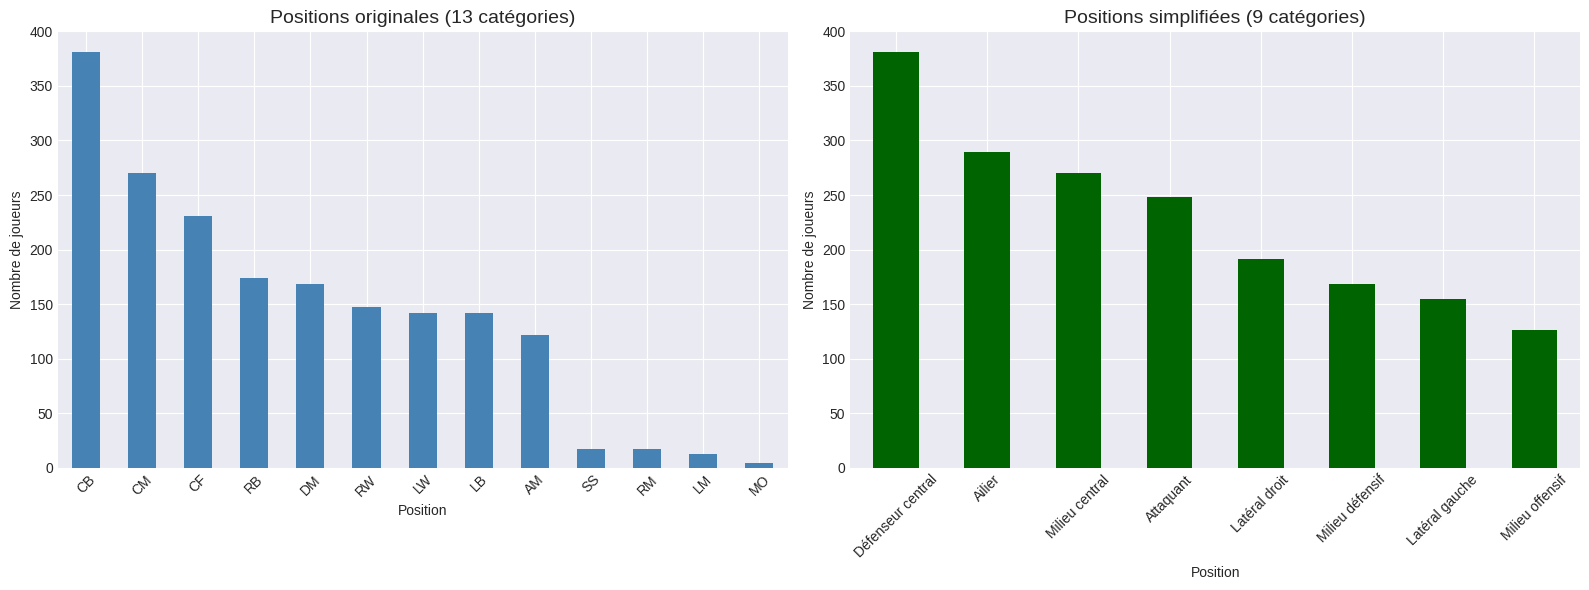


Dataset final : 1828 joueurs en 8 catégories


In [44]:
# Visualisation comparative
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

df_clean['Position'].value_counts().plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Positions originales (13 catégories)', fontsize=14)
ax1.set_xlabel('Position')
ax1.set_ylabel('Nombre de joueurs')
ax1.tick_params(axis='x', rotation=45)

position_simple_counts.plot(kind='bar', ax=ax2, color='darkgreen')
ax2.set_title('Positions simplifiées (9 catégories)', fontsize=14)
ax2.set_xlabel('Position')
ax2.set_ylabel('Nombre de joueurs')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"\nDataset final : {df_clean.shape[0]} joueurs en {df_clean['Position_Simple'].nunique()} catégories")

## 6. Identification des variables

In [45]:
categorical_cols = ['player_name', 'Position', 'Position_Simple', 'Team Name']
numeric_cols = [col for col in df_clean.columns if col not in categorical_cols]

print(f"Variables catégorielles ({len(categorical_cols)}) :")
for col in categorical_cols:
    print(f"  - {col}")

print(f"\nVariables numériques ({len(numeric_cols)}) :")
for i, col in enumerate(numeric_cols, 1):
    print(f"  {i:2d}. {col}")

Variables catégorielles (4) :
  - player_name
  - Position
  - Position_Simple
  - Team Name

Variables numériques (20) :
   1. Buts (sans les pénaltys)
   2. npxG: xG sans les pénaltys
   3. Total des tirs
   4. Passes décisives
   5. xAG: Prévu(s) Buts assistés
   6. npxG + xAG
   7. Actions menant à un tir
   8. Passes tentées
   9. % de passes réussies
  10. Passes progressives
  11. Possessions progressives
  12. Dribbles réussis
  13. Touches (SurfRépOff)
  14. Passes progressives reçues
  15. Tacles
  16. Interceptions
  17. Balles contrées
  18. Dégagements
  19. Duel aérien gagnés
  20. Age


## 7. Détection des outliers

### 7.1 Visualisation des variables offensives

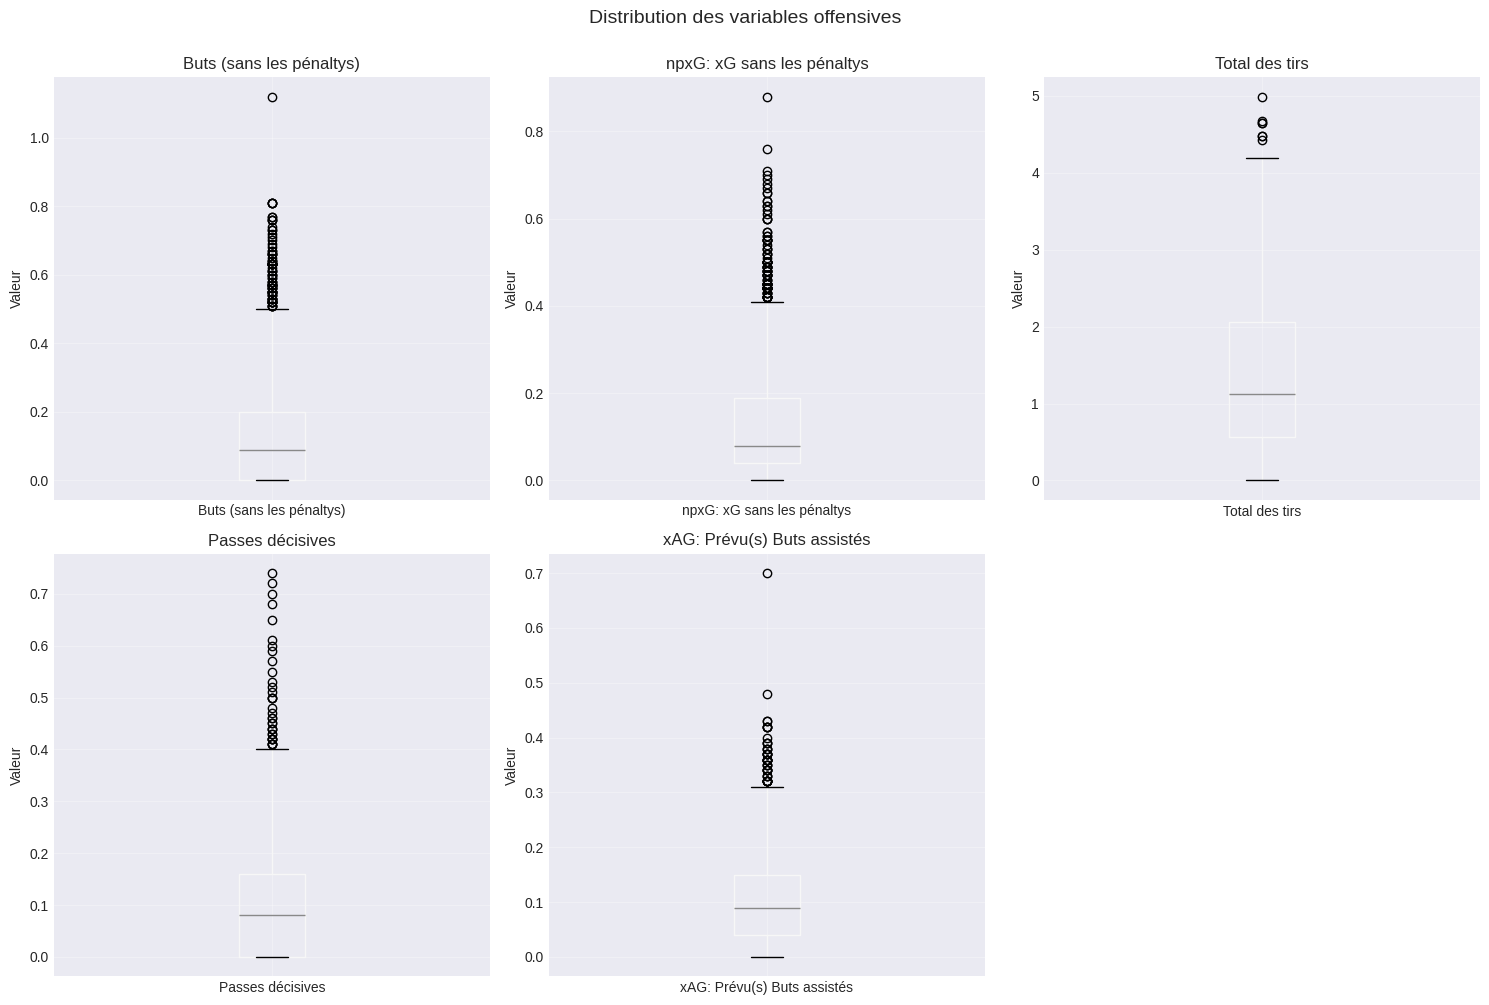

In [46]:
offensive_vars = ['Buts (sans les pénaltys)', 'npxG: xG sans les pénaltys', 
                  'Total des tirs', 'Passes décisives', 'xAG: Prévu(s) Buts assistés']

offensive_vars = [var for var in offensive_vars if var in df_clean.columns]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(offensive_vars):
    df_clean.boxplot(column=col, ax=axes[idx])
    axes[idx].set_title(f'{col}')
    axes[idx].set_ylabel('Valeur')
    axes[idx].grid(True, alpha=0.3)

for idx in range(len(offensive_vars), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Distribution des variables offensives', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

### 7.2 Visualisation des variables défensives

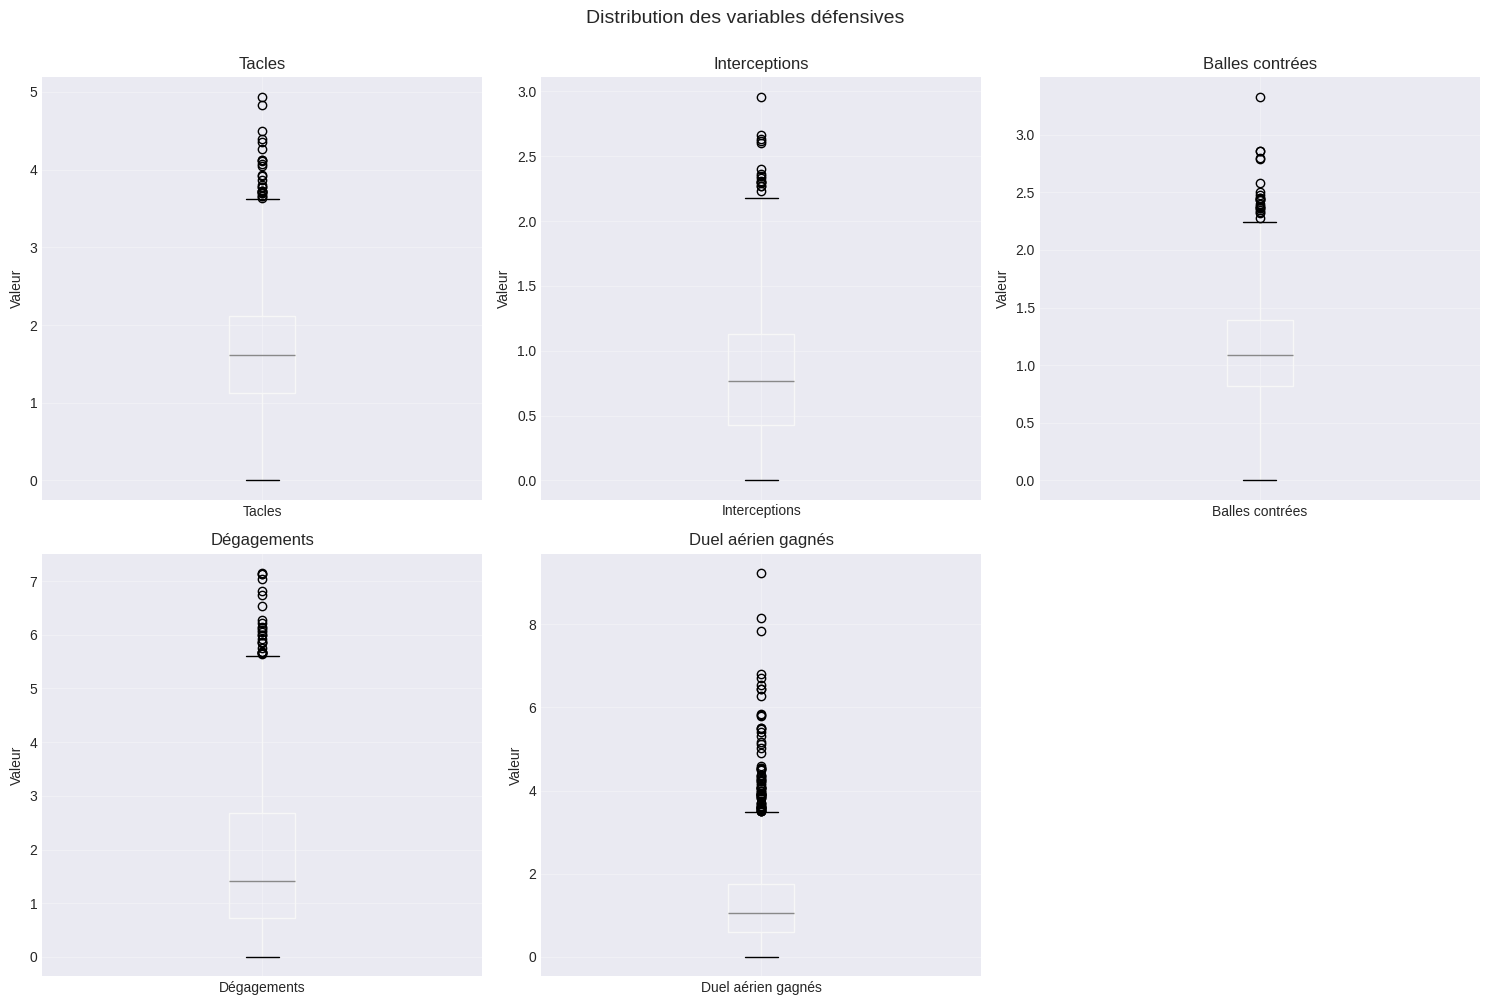

In [47]:
defensive_vars = ['Tacles', 'Interceptions', 'Balles contrées', 
                  'Dégagements', 'Duel aérien gagnés']

defensive_vars = [var for var in defensive_vars if var in df_clean.columns]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(defensive_vars):
    df_clean.boxplot(column=col, ax=axes[idx])
    axes[idx].set_title(f'{col}')
    axes[idx].set_ylabel('Valeur')
    axes[idx].grid(True, alpha=0.3)

for idx in range(len(defensive_vars), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Distribution des variables défensives', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

### 7.3 Statistiques des outliers (méthode IQR)

In [48]:
print("Détection des outliers (méthode IQR, seuil = 1.5):\n")

outlier_summary = []

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(df_clean)) * 100
    
    outlier_summary.append({
        'Variable': col,
        'N_outliers': n_outliers,
        'Pourcentage': f"{pct_outliers:.1f}%",
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('N_outliers', ascending=False)
display(outlier_df.head(10))

Détection des outliers (méthode IQR, seuil = 1.5):



,Variable,N_outliers,Pourcentage,Q1,Q3,IQR
1,npxG: xG sans les pénaltys,103,5.6%,0.04,0.1900,0.1500
0,Buts (sans les pénaltys),84,4.6%,0.00,0.2000,0.2000
11,Dribbles réussis,84,4.6%,0.33,1.1800,0.8500
18,Duel aérien gagnés,73,4.0%,0.59,1.7500,1.1600
10,Possessions progressives,56,3.1%,0.84,2.5325,1.6925
4,xAG: Prévu(s) Buts assistés,46,2.5%,0.04,0.1500,0.1100
3,Passes décisives,35,1.9%,0.00,0.1600,0.1600
9,Passes progressives,32,1.8%,2.55,4.8225,2.2725
5,npxG + xAG,28,1.5%,0.09,0.3600,0.2700
6,Actions menant à un tir,27,1.5%,1.43,3.1300,1.7000


## 8. Matrice de corrélation

### 8.1 Calcul de la matrice de corrélation

In [49]:
correlation_matrix = df_clean[numeric_cols].corr()

print(f"Matrice de corrélation : {correlation_matrix.shape[0]} × {correlation_matrix.shape[1]}")

Matrice de corrélation : 20 × 20


### 8.2 Visualisation de la matrice complète

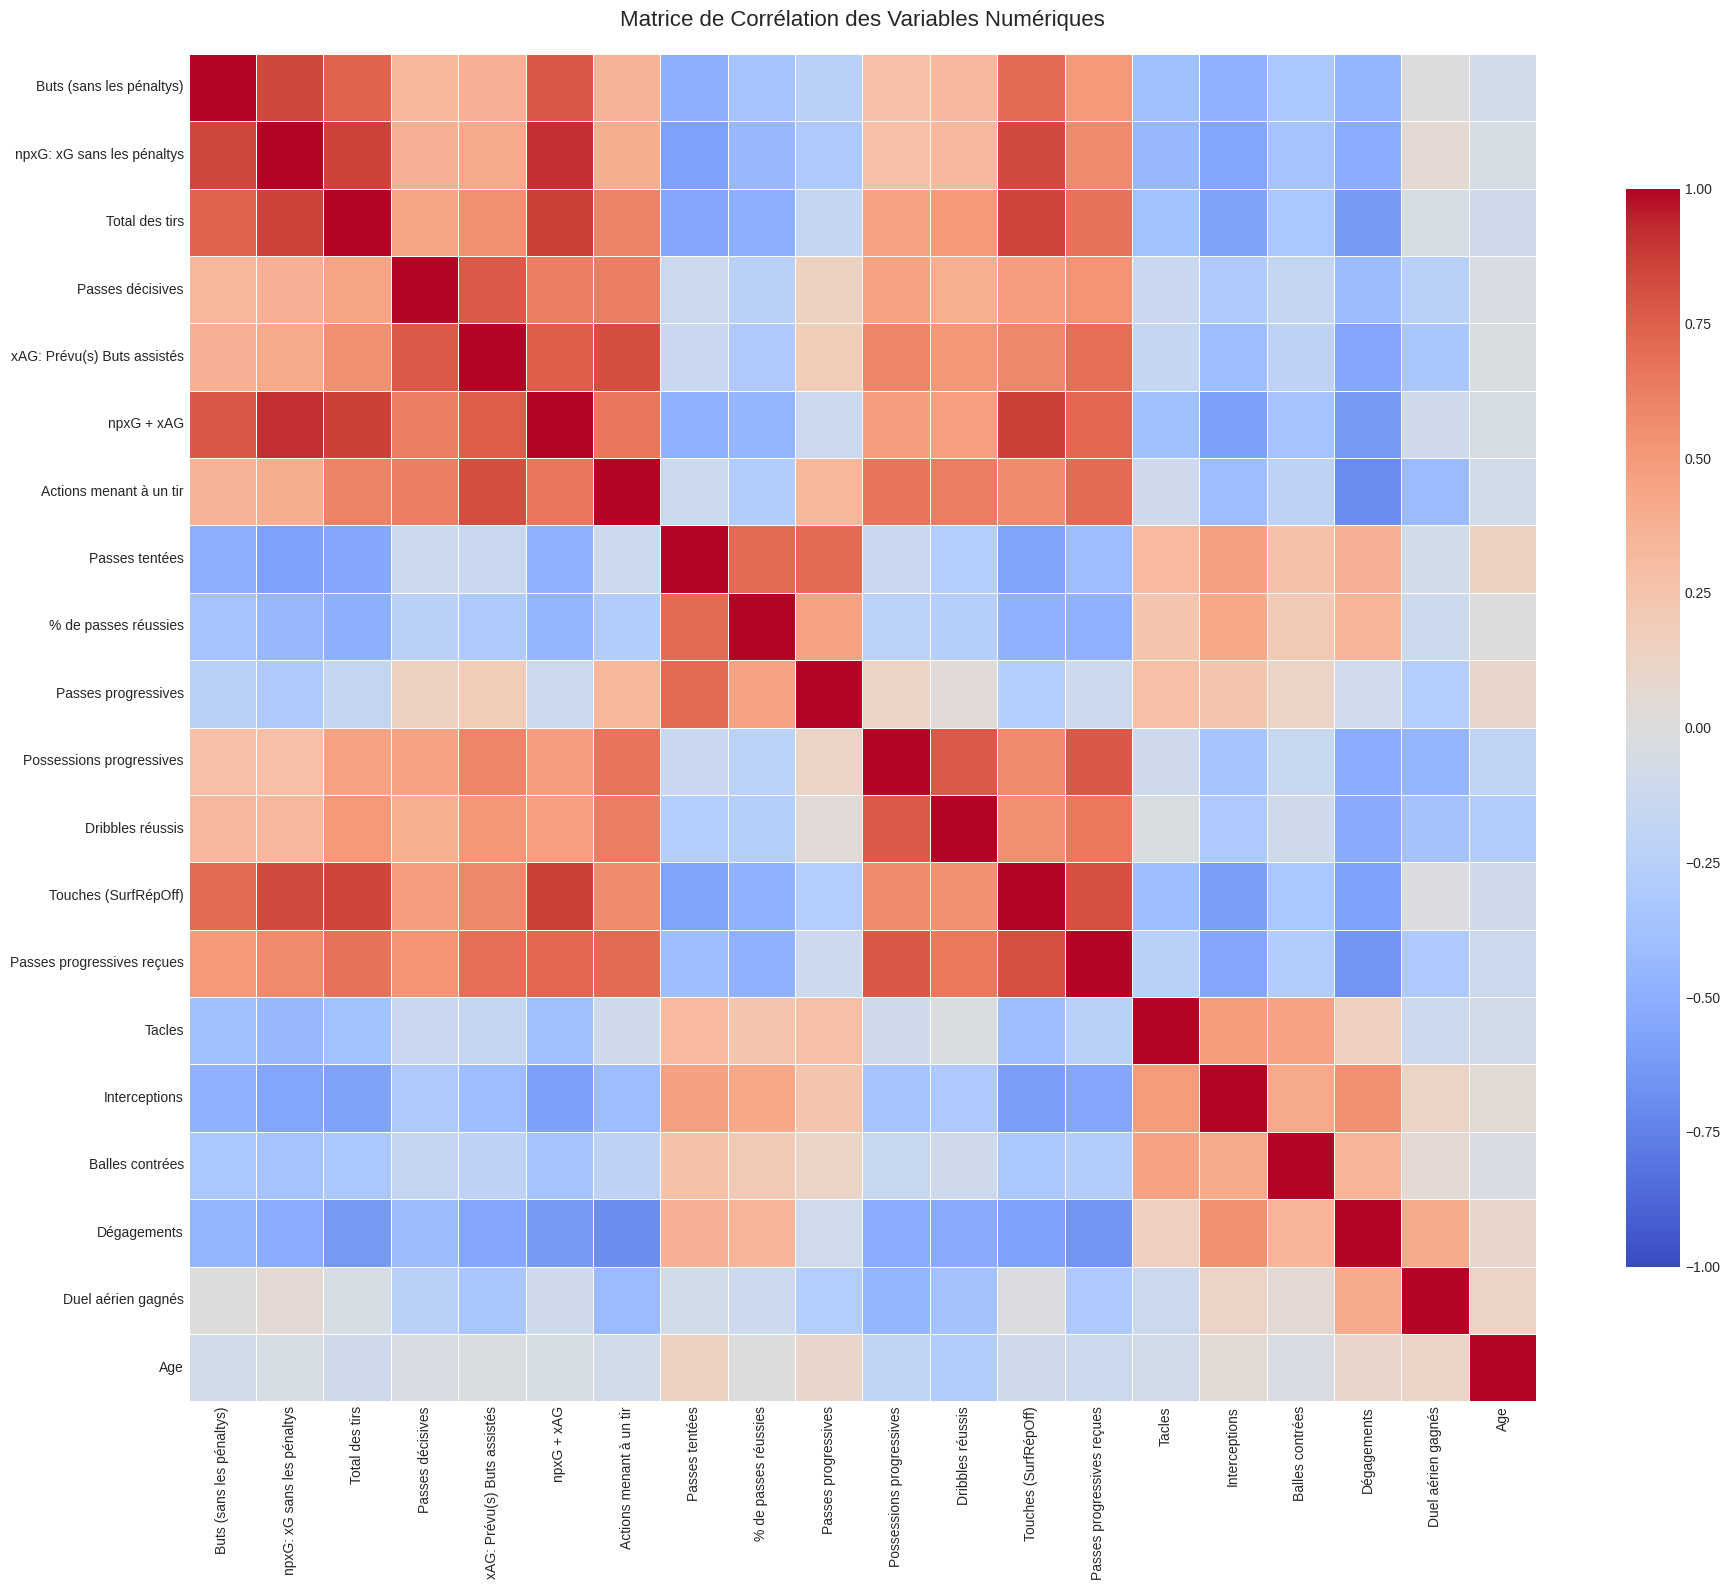

In [50]:
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Matrice de Corrélation des Variables Numériques', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

### 8.3 Identification des corrélations fortes

In [51]:
print("Paires de variables fortement corrélées (|r| > 0.8) :\n")

high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_corr.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Corrélation': corr_value
            })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr).sort_values('Corrélation', key=abs, ascending=False)
    display(high_corr_df)
    print(f"\n{len(high_corr)} paires de variables fortement corrélées")
else:
    print("Aucune corrélation très forte (|r| > 0.8) détectée")

Paires de variables fortement corrélées (|r| > 0.8) :



,Variable 1,Variable 2,Corrélation
2,npxG: xG sans les pénaltys,npxG + xAG,0.910542
7,npxG + xAG,Touches (SurfRépOff),0.864049
4,Total des tirs,npxG + xAG,0.861638
1,npxG: xG sans les pénaltys,Total des tirs,0.856037
5,Total des tirs,Touches (SurfRépOff),0.846902
0,Buts (sans les pénaltys),npxG: xG sans les pénaltys,0.841012
3,npxG: xG sans les pénaltys,Touches (SurfRépOff),0.831987
6,xAG: Prévu(s) Buts assistés,Actions menant à un tir,0.818619
8,Touches (SurfRépOff),Passes progressives reçues,0.811099



9 paires de variables fortement corrélées


### 8.4 Heatmap des corrélations fortes

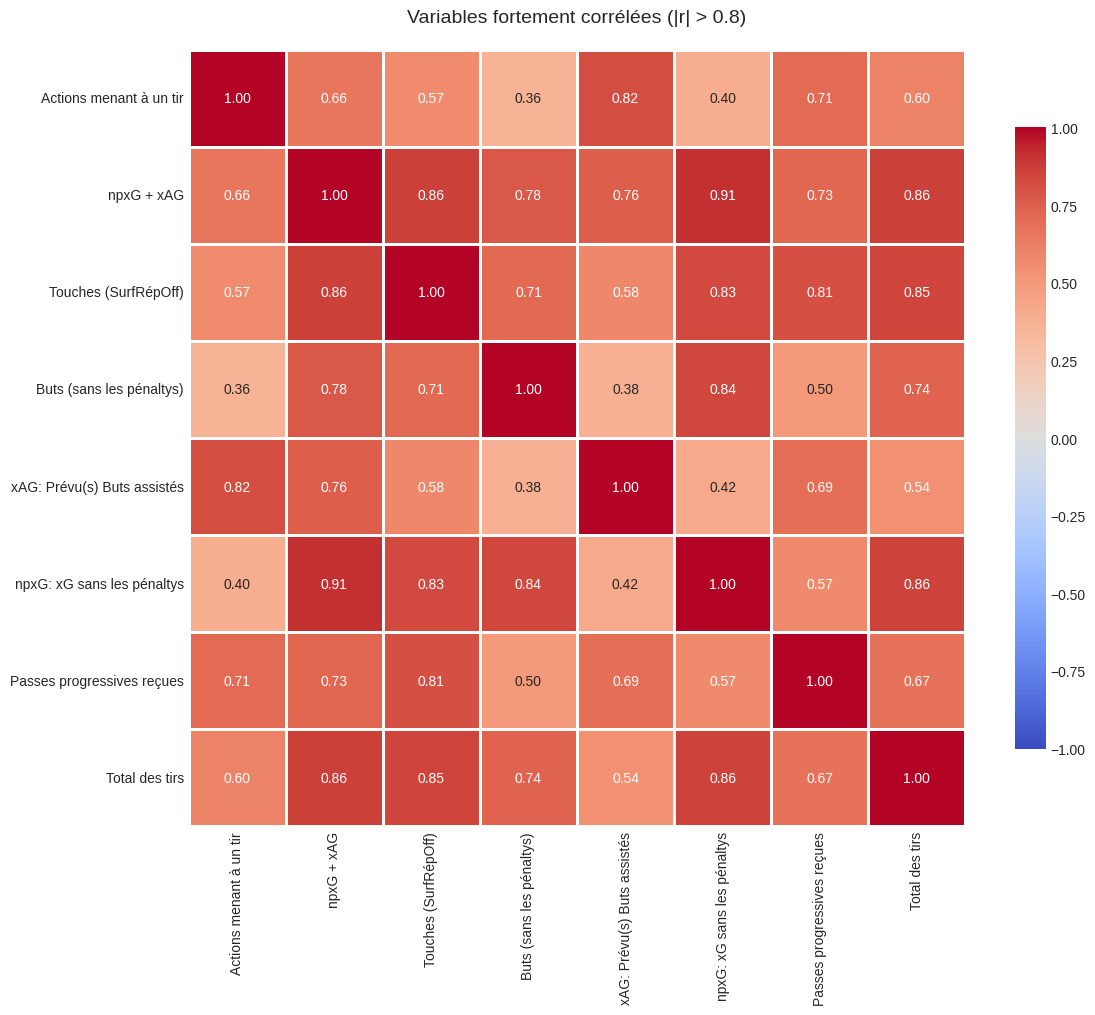

In [52]:
if high_corr:
    vars_high_corr = list(set([item['Variable 1'] for item in high_corr] + 
                              [item['Variable 2'] for item in high_corr]))
    
    corr_subset = correlation_matrix.loc[vars_high_corr, vars_high_corr]
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, fmt='.2f',
                vmin=-1, vmax=1, cbar_kws={"shrink": 0.8})
    plt.title('Variables fortement corrélées (|r| > 0.8)', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

## 9. Sauvegarde des données nettoyées

In [53]:
output_file = '../data/data_cleaned.csv'
df_clean.to_csv(output_file, index=False)

print(f"Dataset nettoyé sauvegardé : {output_file}")
print(f"\nDimensions finales : {df_clean.shape[0]} joueurs × {df_clean.shape[1]} colonnes")

Dataset nettoyé sauvegardé : ../data/data_cleaned.csv

Dimensions finales : 1828 joueurs × 24 colonnes


## 10. Résumé du preprocessing

In [ ]:
print("="*80)
print(" RÉSUMÉ DU PREPROCESSING")
print("="*80)

print(f"\nDONNÉES")
print(f"  • Nombre de joueurs    : {df_clean.shape[0]}")
print(f"  • Nombre d'équipes     : {df_clean['Team Name'].nunique()}")
print(f"  • Nombre de positions  : {df_clean['Position_Simple'].nunique()}")
print(f"  • Âge moyen            : {df_clean['Age'].mean():.1f} ans")

print(f"\nVARIABLES")
print(f"  • Variables catégorielles : {len(categorical_cols)}")
print(f"  • Variables numériques    : {len(numeric_cols)}")

print(f"\nQUALITÉ DES DONNÉES")
print(f"  • Valeurs manquantes      : {df_clean.isnull().sum().sum()}")
print(f"  • Lignes supprimées       : {df.shape[0] - df_clean.shape[0]}")

if high_corr:
    print(f"\nCORRÉLATIONS FORTES")
    print(f"  • Paires corrélées (|r|>0.8) : {len(high_corr)}")

print(f"\nFICHIERS GÉNÉRÉS")
print(f"  • {output_file}")

print("\n" + "="*80)
print("PREPROCESSING TERMINÉ")
print("="*80)

 RÉSUMÉ DU PREPROCESSING

DONNÉES
  • Nombre de joueurs    : 1828
  • Nombre d'équipes     : 102
  • Nombre de positions  : 8
  • Âge moyen            : 26.3 ans

VARIABLES
  • Variables catégorielles : 4
  • Variables numériques    : 20

QUALITÉ DES DONNÉES
  • Valeurs manquantes      : 0
  • Lignes supprimées       : 5

CORRÉLATIONS FORTES
  • Paires corrélées (|r|>0.8) : 9

FICHIERS GÉNÉRÉS
  • ../data/data_cleaned.csv

PREPROCESSING TERMINÉ

Prochaine étape : Feature Engineering et Normalisation
